In [1]:
# my imports
# import TensorFlow
import tensorflow as tf

# import numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import logistic regression
from sklearn.linear_model import LogisticRegression
# import decision tree
from sklearn.tree import DecisionTreeClassifier
# import random forest
from sklearn.ensemble import RandomForestClassifier
# import hp tuning
from sklearn.model_selection import GridSearchCV
# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load in the data from the MNIST handwritten digits dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Print shape of (x_train, y_train), (x_test, y_test)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [6]:
y_train[0]

5

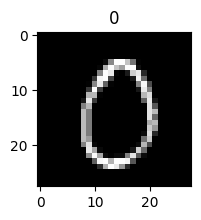

In [7]:
# Plot x_train[210] using mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[210], cmap='gray')
plt.title(y_train[210])
plt.show()

Data set normalizing

In [8]:
# Normalizing
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


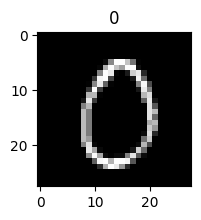

In [9]:
# Plot x_train[210] using mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x_train[210], cmap='gray')
plt.title(y_train[210])
plt.show()


Flattening the images

In order to train the model we need to flatten the images in a n_samples, 784_features matrix using np.reshape(n, -1).

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (28, 28) into shape (784,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image. As digits.images is of type numpy.ndarray we can use np.reshape((-1, 28*28)). By using the '-1' as value form number of columns NumPy calculates the number of columns automatically by dividing the total number of elements in the array by n_samples.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

Logistic regression

In [ ]:
# logistic regression

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(x_train.reshape(-1, 28*28), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy score
print("Accuracy score:", logreg.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.9258


In [ ]:
# classification report
print("Classification report:\n", classification_report(y_test, logreg.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
# confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, logreg.predict(x_test.reshape(-1, 28*28))))

Confusion matrix:
 [[ 959    0    0    3    1    7    5    4    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  926   16    9    4   13    6   39    4]
 [   4    1   18  917    1   22    4   11   25    7]
 [   1    1    7    3  914    0   10    4   10   32]
 [  10    2    3   34    7  783   14    6   29    4]
 [   9    3    8    2    7   14  912    2    1    0]
 [   1    8   24    5    7    1    0  950    3   29]
 [   9   11    8   23    7   25   12    7  861   11]
 [   9    8    0   11   24    6    0   19    7  925]]


Decision Tree

In [ ]:
# decision tree

# Create a decision tree model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(x_train.reshape(-1, 28*28), y_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score
print("Accuracy score:", dt.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.8771


In [ ]:
# classification report
print("Classification report:\n", classification_report(y_test, dt.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       980
           1       0.94      0.97      0.96      1135
           2       0.86      0.85      0.85      1032
           3       0.84      0.86      0.85      1010
           4       0.87      0.87      0.87       982
           5       0.84      0.84      0.84       892
           6       0.89      0.89      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.83      0.80      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, dt.predict(x_test.reshape(-1, 28*28))))

Confusion matrix:
 [[ 912    0    6    4    4   16   16    4   10    8]
 [   0 1098   10    3    1    7    7    3    5    1]
 [  13   14  875   32   18   14   12   24   21    9]
 [   9    8   30  865    8   40    4    6   23   17]
 [   4    6   15    5  856    7   18    7   20   44]
 [  13    8    5   35    6  751   22    8   25   19]
 [  17    5   14   10   21   16  849    2   20    4]
 [   4   14   23   16    9    5    1  924   12   20]
 [  10    7   36   42   23   28   15    7  780   26]
 [  14    4    6   23   40   11    6   21   23  861]]


Random Forest

In [ ]:
# random forest

# Create a random forest model
rf = RandomForestClassifier()

# Fit the model to the training data
rf.fit(x_train.reshape(-1, 28*28), y_train)

RandomForestClassifier()

In [ ]:
# accuracy score
print("Accuracy score:", rf.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.9694


In [ ]:
# classification report
print("Classification report:\n", classification_report(y_test, rf.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, rf.predict(x_test.reshape(-1, 28*28))))

Confusion matrix:
 [[ 969    0    0    0    0    2    3    1    4    1]
 [   0 1122    3    3    0    2    3    1    1    0]
 [   6    0  999    6    2    0    4    8    7    0]
 [   0    0    8  973    0    7    0    9    9    4]
 [   1    0    1    0  955    0    6    0    2   17]
 [   2    0    1   13    3  859    3    3    6    2]
 [   6    3    0    0    2    2  942    0    3    0]
 [   1    1   20    2    3    0    0  990    2    9]
 [   4    0    6    9    6    5    4    3  929    8]
 [   8    5    1   10   14    2    1    6    6  956]]


Random Forest with hyperparameter tuning

In [11]:
# Random Forest Classifier with GridSearchCV hyperparameter tuning

parameters_to_be_tuned = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create a random forest model
rf = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_to_be_tuned,
                           cv=3, verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train.reshape(-1, 28*28), y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9659666666666666


In [12]:
# accuracy score
print("Accuracy score:", grid_search.score(x_test.reshape(-1, 28*28), y_test))

Accuracy score: 0.9709


In [13]:
# classification report
print("Classification report:\n", classification_report(y_test, grid_search.predict(x_test.reshape(-1, 28*28))))

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [14]:
# confusion matrix
print("Confusion matrix:\n", confusion_matrix(y_test, grid_search.predict(x_test.reshape(-1, 28*28))))

Confusion matrix:
 [[ 971    0    0    0    0    2    2    1    3    1]
 [   0 1124    1    4    0    2    2    1    1    0]
 [   6    1  997    5    2    1    4   10    6    0]
 [   0    0   10  975    0    4    0    9    9    3]
 [   1    0    3    0  955    0    4    0    3   16]
 [   2    0    0   12    2  861    6    1    5    3]
 [   5    3    1    0    3    3  939    0    4    0]
 [   1    2   18    1    1    0    0  994    2    9]
 [   3    0    5    7    3    4    4    3  936    9]
 [   6    5    2   14   14    1    1    4    5  957]]


Convolution Neural Network

In [10]:
# Build/ Instantiate the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# sparse_categorical_crossentropy is similar to One Hot Encoding,
# sparse since most of the elements are zero.

In [12]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8783 - loss: 0.4316 - val_accuracy: 0.9547 - val_loss: 0.1543
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9650 - loss: 0.1209 - val_accuracy: 0.9690 - val_loss: 0.0950
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0798 - val_accuracy: 0.9724 - val_loss: 0.0874
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9819 - loss: 0.0595 - val_accuracy: 0.9743 - val_loss: 0.0791
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9864 - loss: 0.0449 - val_accuracy: 0.9760 - val_loss: 0.0797
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9899 - loss: 0.0333 - val_accuracy: 0.9772 - val_loss: 0.0774
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9770 - val_loss: 0.0803
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9943 - loss: 0.0195 - 

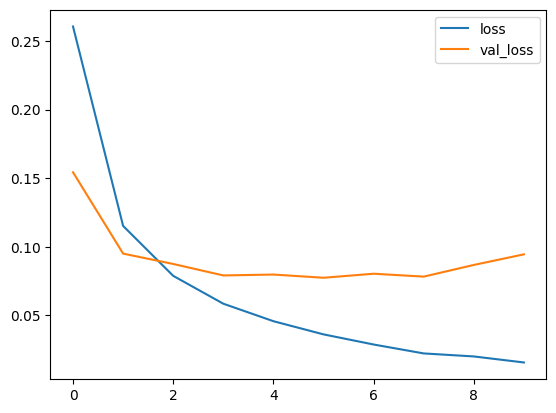

In [13]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

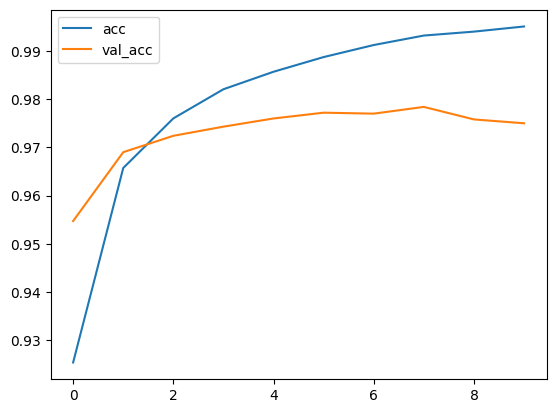

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [20]:
# metrics
r.history.keys()
for key in r.history.keys():
    print(key, r.history[key][-1])

accuracy 0.9951000213623047
loss 0.015587407164275646
val_accuracy 0.9750000238418579
val_loss 0.09446845948696136


Convolution Neural Network with Dropout

In [28]:
# Build/ Instantiate the model
model_w_dropout = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
# Compile the model
model_w_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# sparse_categorical_crossentropy is similar to One Hot Encoding,
# sparse since most of the elements are zero.

In [34]:
# Train the model
r_w_dropout = model_w_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9823 - loss: 0.0560 - val_accuracy: 0.9807 - val_loss: 0.0688
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0521 - val_accuracy: 0.9777 - val_loss: 0.0755
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9842 - loss: 0.0489 - val_accuracy: 0.9793 - val_loss: 0.0703
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0521 - val_accuracy: 0.9793 - val_loss: 0.0737
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9853 - loss: 0.0449 - val_accuracy: 0.9806 - val_loss: 0.0706
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0425 - val_accuracy: 0.9798 - val_loss: 0.0741
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9855 - loss: 0.0441 - val_accuracy: 0.9812 - val_loss: 0.0741
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9870 - loss: 0.0383 - 

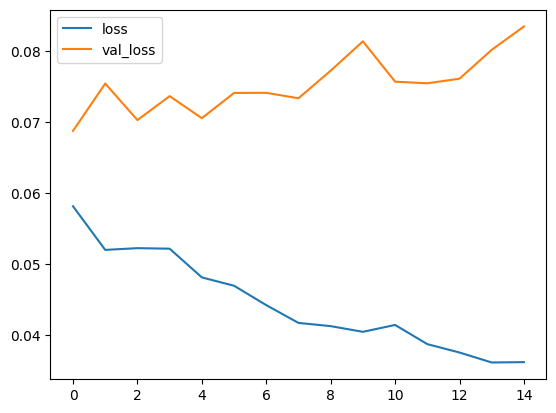

In [35]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r_w_dropout.history['loss'], label='loss')
plt.plot(r_w_dropout.history['val_loss'], label='val_loss')
plt.legend()

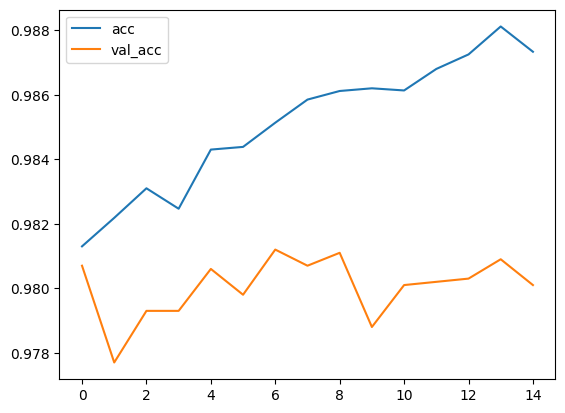

In [36]:
# Plot accuracy per iteration
plt.plot(r_w_dropout.history['accuracy'], label='acc')
plt.plot(r_w_dropout.history['val_accuracy'], label='val_acc')
plt.legend()

In [37]:
# metrics
r_w_dropout.history.keys()
for key in r_w_dropout.history.keys():
    print(key, r_w_dropout.history[key][-1])

accuracy 0.987333357334137
loss 0.03613002225756645
val_accuracy 0.9800999760627747
val_loss 0.08351008594036102
